# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Razha Jamsik Syah
- **Email:** razhajamsiksyah@gmail.com
- **ID Dicoding:** razha_jamsik_syah

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca memengaruhi jumlah penyewaan sepeda?
- Bagaimana hari kerja dan hari libur memengaruhi perilaku penyewaan sepeda?
- Apakah terdapat pola penggunaan sepeda yang berbeda antara pengguna kasual dan pengguna terdaftar?
- Apakah ada peningkatan atau penurunan tren penyewaan sepeda dari tahun ke tahun

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat Data Day

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- instant: Nomor urut data (index) untuk setiap baris, berfungsi sebagai identifikasi unik untuk setiap observasi.
- dteday: Tanggal pencatatan dalam format YYYY-MM-DD yang menunjukkan kapan data dikumpulkan.
- season: Musim dalam setahun, dinyatakan dengan angka 1 hingga 4:
    - 1: Musim semi
    - 2: Musim panas
    - 3: Musim gugur
    - 4: Musim dingin
- yr: Tahun, dinyatakan sebagai angka biner:
    - 0: Tahun 2011
    - 1: Tahun 2012
- mnth: Bulan, dinyatakan dengan angka 1 hingga 12, yang menunjukkan bulan Januari hingga Desember.
- holiday: Indikator hari libur, biner:
    - 0: Bukan hari libur
    - 1: Hari libur
- weekday: Hari dalam seminggu, dinyatakan dengan angka 0 hingga 6:
    - 0: Minggu
    - 1: Senin
    - 2: Selasa
    - 3: Rabu
    - 4: Kamis
    - 5: Jumat
    - 6: Sabtu
- workingday: Indikator apakah hari tersebut adalah hari kerja, biner:
    - 0: Bukan hari kerja (akhir pekan atau hari libur)
    - 1: Hari kerja (bukan hari libur)
- weathersit: Kondisi cuaca, diklasifikasikan dalam empat kategori:
    - 1: Cuaca cerah atau sedikit berawan
    - 2: Berkabut atau mendung
    - 3: Hujan ringan, hujan salju
    - 4: Hujan deras, badai
- temp: Suhu aktual yang dinormalisasi, dalam skala antara 0 hingga 1.
- atemp: Suhu yang dirasakan, juga dinormalisasi antara 0 hingga 1, mempertimbangkan kelembaban dan angin.
- hum: Kelembaban udara, dinormalisasi antara 0 hingga 1.
- windspeed: Kecepatan angin, dinormalisasi antara 0 hingga 1.
- casual: Jumlah pengguna sepeda non-terdaftar yang menggunakan layanan sepeda pada hari tersebut.
- registered: Jumlah pengguna terdaftar yang menggunakan layanan sepeda pada hari tersebut.
- cnt: Total jumlah sepeda yang disewa (penjumlahan dari kolom casual dan registered).


#### Memuat Data Hour

In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: Nomor urut data (index) untuk setiap baris, berfungsi sebagai identifikasi unik untuk setiap observasi.
- dteday: Tanggal pencatatan dalam format YYYY-MM-DD yang menunjukkan kapan data dikumpulkan.
- season: Musim dalam setahun, dinyatakan dengan angka 1 hingga 4:
    - 1: Musim semi
    - 2: Musim panas
    - 3: Musim gugur
    - 4: Musim dingin
- yr: Tahun, dinyatakan sebagai angka biner:
    - 0: Tahun 2011
    - 1: Tahun 2012
- mnth: Bulan, dinyatakan dengan angka 1 hingga 12, yang menunjukkan bulan Januari hingga Desember.
- holiday: Indikator hari libur, biner:
    - 0: Bukan hari libur
    - 1: Hari libur
- weekday: Hari dalam seminggu, dinyatakan dengan angka 0 hingga 6:
    - 0: Minggu
    - 1: Senin
    - 2: Selasa
    - 3: Rabu
    - 4: Kamis
    - 5: Jumat
    - 6: Sabtu
- workingday: Indikator apakah hari tersebut adalah hari kerja, biner:
    - 0: Bukan hari kerja (akhir pekan atau hari libur)
    - 1: Hari kerja (bukan hari libur)
- weathersit: Kondisi cuaca, diklasifikasikan dalam empat kategori:
    - 1: Cuaca cerah atau sedikit berawan
    - 2: Berkabut atau mendung
    - 3: Hujan ringan, hujan salju
    - 4: Hujan deras, badai
- temp: Suhu aktual yang dinormalisasi, dalam skala antara 0 hingga 1.
- atemp: Suhu yang dirasakan, juga dinormalisasi antara 0 hingga 1, mempertimbangkan kelembaban dan angin.
- hum: Kelembaban udara, dinormalisasi antara 0 hingga 1.
- windspeed: Kecepatan angin, dinormalisasi antara 0 hingga 1.
- casual: Jumlah pengguna sepeda non-terdaftar yang menggunakan layanan sepeda pada hari tersebut.
- registered: Jumlah pengguna terdaftar yang menggunakan layanan sepeda pada hari tersebut.
- cnt: Total jumlah sepeda yang disewa (penjumlahan dari kolom casual dan registered).


### Assessing Data

#### Menilai Data Day

##### Memeriksa Tipe Data Day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Type data "dteday" adalah object, seharusnya adalah type data datetime

##### Memeriksa Missing Value

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Memeriksa Duplikasi Data pada Day

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memeriksa parameter statistik dari setiap kolom numerik

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- xxx
- xxx

#### Menilai Data Hour

##### Memeriksa Type Data

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tipe data dteday adalah object , seharusnya dalah datetime

##### Memeriksa Missing Value

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Memeriksa Duplikasi Data

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik 

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Hasil Assesing Data

| Variable | Tipe Data | Missing Value | Duplicate Data | Inaccurate Data |
|----------|-----------|---------------|----------------|-----------------|
|   day_df | Kesalahan Tipe data pada coloum dteday, diubah menjadi datetime |  | | |
| hour_day | Kesalahan Tipe data pada coloum dteday, diubah menjadi datetime | | | |

### Cleaning Data

#### Memperbaiki data Day

In [13]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Memperbaiki Data Hour

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explorasi data Day

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Faktor cuaca (variabel weathersit, temp, atemp, hum, windspeed) tampaknya berpengaruh terhadap jumlah penyewaan sepeda. Misalnya, rata-rata suhu (temp) sekitar 0,49 menunjukkan bahwa penyewaan terjadi lebih banyak pada hari-hari dengan cuaca yang nyaman, karena suhu yang terlalu rendah atau terlalu tinggi cenderung mengurangi jumlah penyewaan. 
- Data menunjukkan variabel holiday dan workingday. Rata-rata nilai workingday sebesar 0,68 mengindikasikan bahwa mayoritas penyewaan terjadi pada hari kerja.
- Nilai rata-rata penyewaan untuk pengguna kasual (casual) sekitar 848 dan untuk pengguna terdaftar (registered) sekitar 3656, menunjukkan bahwa pengguna terdaftar secara konsisten menyewa lebih banyak sepeda daripada pengguna kasual. 

In [16]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
day_df.groupby('season')['cnt'].mean()

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [17]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca

day_df.groupby(by="weathersit").agg({
    "cnt": ["mean", "min", "max", "std"]
})


cnt                        
                   mean  min   max          std
weathersit                                     
1           4876.786177  431  8714  1879.483989
2           4035.862348  605  8362  1809.109918
3           1803.285714   22  4639  1240.284449

In [18]:
# Pengaruh Hari Kerja dan Hari Libur
day_df.groupby(by="workingday").agg({
    "cnt": ["mean", "min", "max", "std"]
})


cnt                        
                   mean  min   max          std
workingday                                     
0           4330.168831  605  8714  2052.141245
1           4584.820000   22  8362  1878.415583

In [19]:
# Perbandingan Pengguna Kasual vs Pengguna Terdaftar
day_df[['casual', 'registered']].agg({
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})


,casual,registered
mean,848.176471,3656.172367
min,2.000000,20.000000
max,3410.000000,6946.000000
std,686.622488,1560.256377


In [20]:
# Waktu mempengaruhi penyewaan sepeda
day_df.groupby(by="mnth").agg({
    "cnt": ["mean", "min", "max", "std"]
})

cnt                         
             mean   min   max          std
mnth                                      
1     2176.338710   431  4521  1161.674370
2     2655.298246  1005  5062  1145.313307
3     3692.258065   605  8362  1899.301812
4     4484.900000   795  7460  1776.160778
5     5349.774194  2633  8294  1298.711561
6     5772.366667  3767  8120  1240.400031
7     5563.677419  3285  8173  1273.751871
8     5664.419355  1115  7865  1494.516146
9     5766.516667  1842  8714  1810.130649
10    5199.225806    22  8156  1988.392517
11    4247.183333  1495  6852  1285.712709
12    3403.806452   441  6606  1549.639353

In [21]:
# Tren dari tahun ke Tahun
day_df.groupby(by="yr").agg({
    "cnt": ["mean", "min", "max", "std"]
})


cnt                        
           mean  min   max          std
yr                                     
0   3405.761644  431  6043  1378.753666
1   5599.934426   22  8714  1788.667868

### Explorasi data Hour

In [22]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
hour_df.groupby('season')['cnt'].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

In [24]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca

hour_df.groupby(by="weathersit").agg({
    "cnt": ["mean", "min", "max", "std"]
})


cnt                     
                  mean min  max         std
weathersit                                 
1           204.869272   1  977  189.487773
2           175.165493   1  957  165.431589
3           111.579281   1  891  133.781045
4            74.333333  23  164   77.925178

In [25]:
# Pengaruh Hari Kerja dan Hari Libur
hour_df.groupby(by="workingday").agg({
    "cnt": ["mean", "min", "max", "std"]
})


cnt                     
                  mean min  max         std
workingday                                 
0           181.405332   1  783  172.853832
1           193.207754   1  977  185.107477

In [26]:
# Perbandingan Pengguna Kasual vs Pengguna Terdaftar
hour_df[['casual', 'registered']].agg({
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})


,casual,registered
mean,35.676218,153.786869
min,0.000000,0.000000
max,367.000000,886.000000
std,49.305030,151.357286


In [27]:
# Waktu mempengaruhi penyewaan sepeda
hour_df.groupby(by="mnth").agg({
    "cnt": ["mean", "min", "max", "std"]
})

cnt                     
            mean min  max         std
mnth                                 
1      94.424773   1  559   99.907146
2     112.865026   1  610  112.486565
3     155.410726   1  957  163.543050
4     187.260960   1  822  181.137902
5     222.907258   1  873  187.721497
6     240.515278   1  900  196.038950
7     231.819892   1  913  187.483806
8     238.097627   1  941  200.444648
9     240.773138   1  977  214.609531
10    222.158511   1  963  203.477057
11    177.335421   1  729  158.973887
12    142.303439   1  759  141.080674

In [28]:
# Tren dari tahun ke Tahun
hour_df.groupby(by="yr").agg({
    "cnt": ["mean", "min", "max", "std"]
})


cnt                     
          mean min  max         std
yr                                 
0   143.794448   1  651  133.797854
1   234.666361   1  977  208.910941

## Visualization & Explanatory Analysis

### Bagaimana faktor cuaca memengaruhi jumlah penyewaan sepeda?

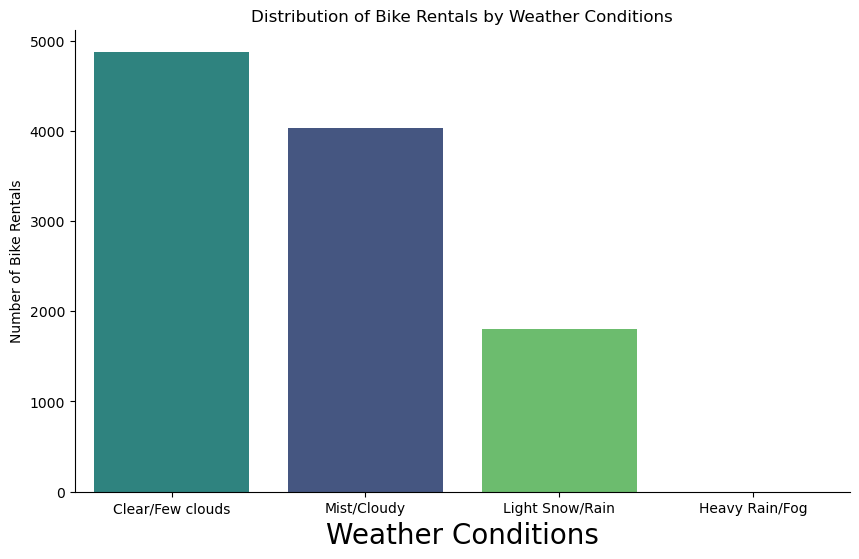

In [29]:
weather_labels = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Fog'
}
day_df['weather_impact'] = day_df['weathersit'].map(weather_labels)


# Visualisasi menggunakan Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_impact', y='cnt', data=day_df, errorbar=None, hue='weather_impact', palette='viridis', legend=False, order=['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Fog'])
sns.despine()
plt.title('Distribution of Bike Rentals by Weather Conditions')
plt.xlabel('Weather Conditions', fontsize=20)
plt.ylabel('Number of Bike Rentals')
plt.grid(False)
plt.show()

Dalam data penyewaan sepeda harian, bahwa hari cerah mendapatkan penyewaan sepeda terbanyak sedangkan hujan sama sekali tidak terjadi penyewaan sepeda, faktor cuaca sangat mempengaruhi penyewaan sepeda.

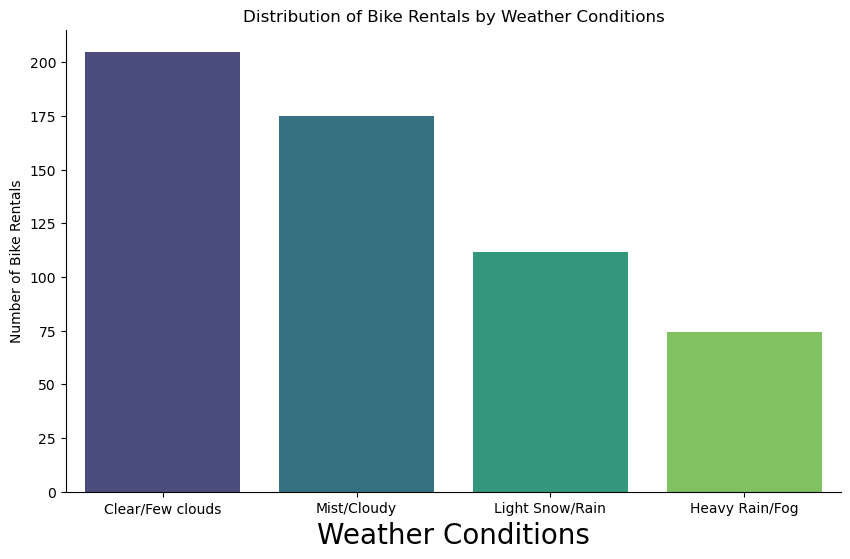

In [30]:
weather_labels = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Fog'
}


hour_df['weather_impact'] = hour_df['weathersit'].map(weather_labels)

# Visualisasi menggunakan Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_impact', y='cnt', data=hour_df, errorbar=None, hue='weather_impact', palette='viridis', legend=False, order=['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Fog'])
sns.despine()
plt.title('Distribution of Bike Rentals by Weather Conditions')
plt.xlabel('Weather Conditions', fontsize=20)
plt.ylabel('Number of Bike Rentals')
plt.grid(False)
plt.show()

Dalam data penyewaan sepeda perjam, bahwa hari cerah mendapatkan penyewaan sepeda terbanyak sedangkan hujan terjadi penurunan signifikan penyewaan sepeda, faktor cuaca sangat mempengaruhi penyewaan sepeda.

### Bagaimana hari kerja dan hari libur memengaruhi perilaku penyewaan sepeda?

#### Mulai dari data Day

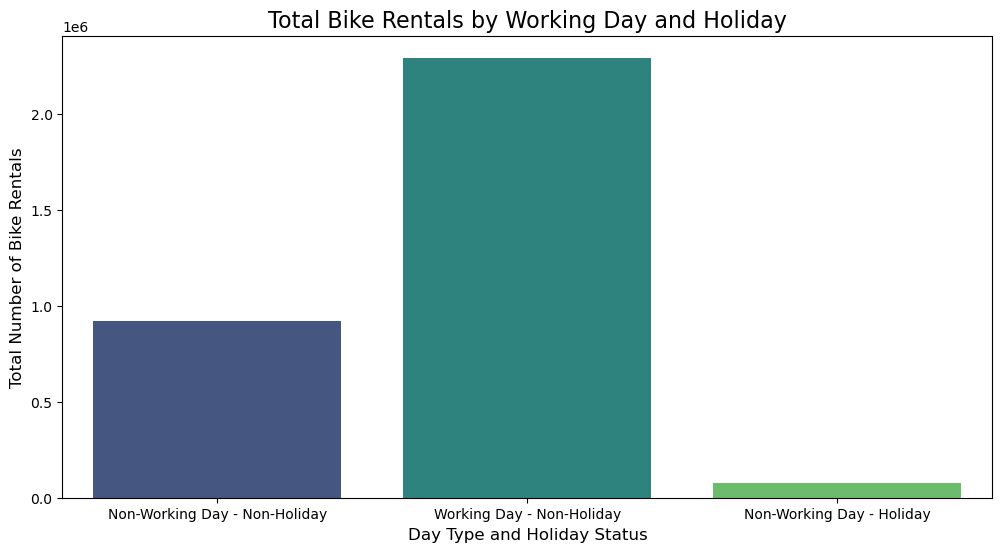

In [31]:
# Membuat kategori gabungan workingday dan holiday

day_df['day_type'] = day_df.apply(
    lambda row: 'Working Day' if row['workingday'] == 1 else 'Non-Working Day', axis=1
)
day_df['holiday_type'] = day_df.apply(
    lambda row: 'Holiday' if row['holiday'] == 1 else 'Non-Holiday', axis=1
)

# Kombinasikan keduanya
day_df['day_holiday_type'] = day_df['day_type'] + ' - ' + day_df['holiday_type']

plt.figure(figsize=(12, 6))
sns.barplot(x='day_holiday_type', y='cnt',hue='day_holiday_type', data=day_df, estimator=sum, errorbar=None,legend=False , palette='viridis')
plt.title('Total Bike Rentals by Working Day and Holiday', fontsize=16)
plt.xlabel('Day Type and Holiday Status', fontsize=12)
plt.ylabel('Total Number of Bike Rentals', fontsize=12)
plt.show()

- Working Day - Holiday: Untuk melihat berapa banyak penyewaan sepeda pada hari kerja yang bertepatan dengan hari libur.
- Working Day - Non-Holiday: Penyewaan sepeda pada hari kerja biasa.
- Non-Working Day - Holiday: Penyewaan pada akhir pekan yang juga merupakan hari libur.

Dalam data Day, Working Day sangat berpengaruh pada penyewaan sepeda, asumsi orang yang berangkat bekerja membutuhkan penyewaan sepeda untuk sampai ketempat kerja. Berbeda dengan hari Non Working day dan Holiday , terjadi penyusutan secara drastis pemimjaman sepeda di asumsikan kurang aktivitas masyarakat di luar rumah.

#### Mulai data Hour

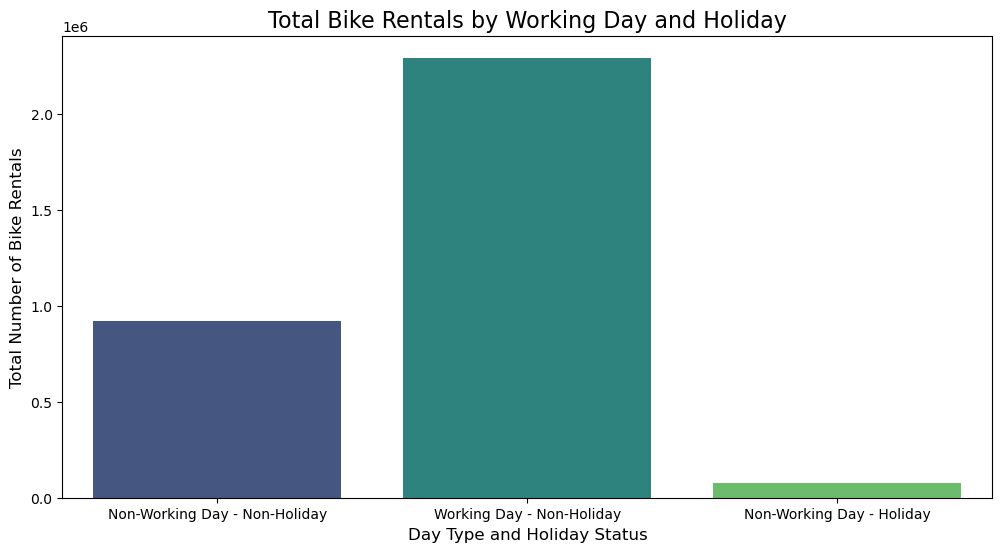

In [32]:
# Membuat kategori gabungan workingday dan holiday

hour_df['day_type'] = hour_df.apply(
    lambda row: 'Working Day' if row['workingday'] == 1 else 'Non-Working Day', axis=1
)
hour_df['holiday_type'] = hour_df.apply(
    lambda row: 'Holiday' if row['holiday'] == 1 else 'Non-Holiday', axis=1
)

# Kombinasikan keduanya
hour_df['day_holiday_type'] = hour_df['day_type'] + ' - ' + hour_df['holiday_type']

plt.figure(figsize=(12, 6))
sns.barplot(x='day_holiday_type', y='cnt',hue='day_holiday_type', data=hour_df, estimator=sum, errorbar=None,legend=False , palette='viridis')
plt.title('Total Bike Rentals by Working Day and Holiday', fontsize=16)
plt.xlabel('Day Type and Holiday Status', fontsize=12)
plt.ylabel('Total Number of Bike Rentals', fontsize=12)
plt.show()

- Working Day - Holiday: Untuk melihat berapa banyak penyewaan sepeda pada hari kerja yang bertepatan dengan hari libur.
- Working Day - Non-Holiday: Penyewaan sepeda pada hari kerja biasa.
- Non-Working Day - Holiday: Penyewaan pada akhir pekan yang juga merupakan hari libur.

Hasil yang sama dalam data Day juga berlaku pada data Hour, Working Day sangat berpengaruh pada penyewaan sepeda, asumsi orang yang berangkat bekerja membutuhkan penyewaan sepeda untuk sampai ketempat kerja. Berbeda dengan hari Non Working day dan Holiday , terjadi penyusutan secara drastis pemimjaman sepeda di asumsikan kurang aktivitas masyarakat di luar rumah.

#### Hasil Menunjukkan
 Hasil Menunjukkan Penggunaan sepeda meningkat pada hari bekerja, berbeda ketika hari libur penurunan signifikan akan terjadi terhadap penyewa sepeda.

### Apakah terdapat pola penggunaan sepeda yang berbeda antara pengguna kasual dan pengguna terdaftar?

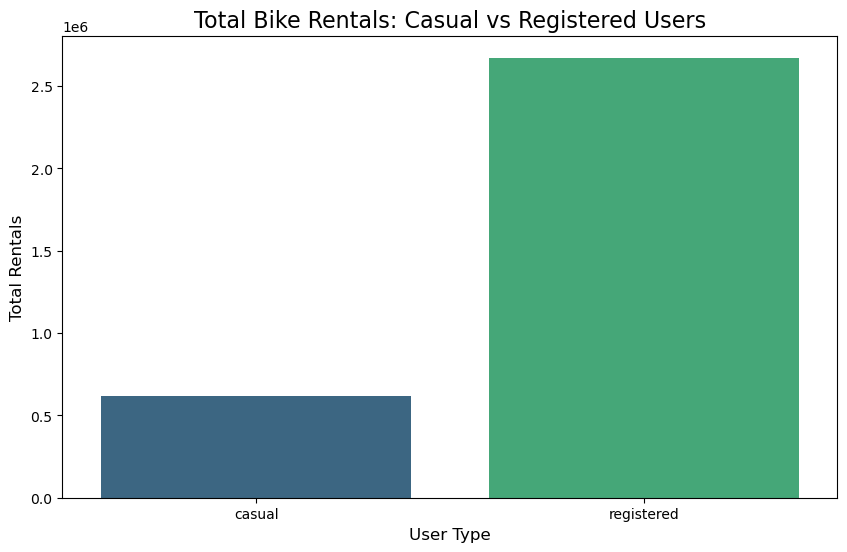

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df[['casual', 'registered']].melt(), x='variable', y='value', hue='variable', estimator=sum, errorbar=None, legend=False, palette='viridis')
plt.title('Total Bike Rentals: Casual vs Registered Users', fontsize=16)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(False)
plt.show()


Hasil Menunjukkan data peminjaman terjadi paling banyak pada registered user.

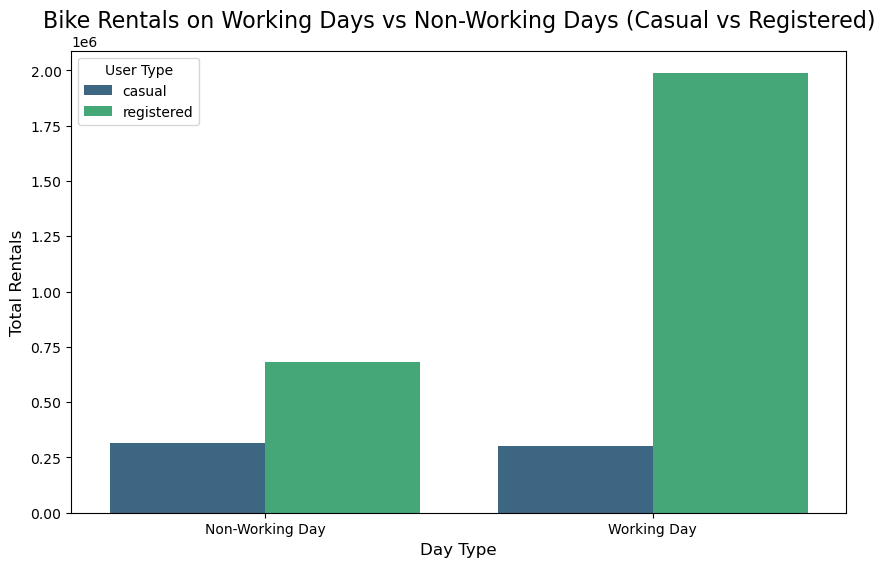

In [34]:
day_df['workingday_label'] = day_df['workingday'].map({1: 'Working Day', 0: 'Non-Working Day'})


plt.figure(figsize=(10, 6))
sns.barplot(x='workingday_label', y='Rentals', hue='User Type', errorbar=None, data=day_df[['workingday_label', 'casual', 'registered']].melt(id_vars='workingday_label', var_name='User Type', value_name='Rentals'), estimator=sum, palette='viridis')

plt.title('Bike Rentals on Working Days vs Non-Working Days (Casual vs Registered)', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(False)
plt.show()


hasil menunjukkan working day terjadi lonjakan peminjaman sepeda dengan registed user dengan hasil tertinggi. casual user berada di posisi serupa dengan dalam working day dan non-working day.

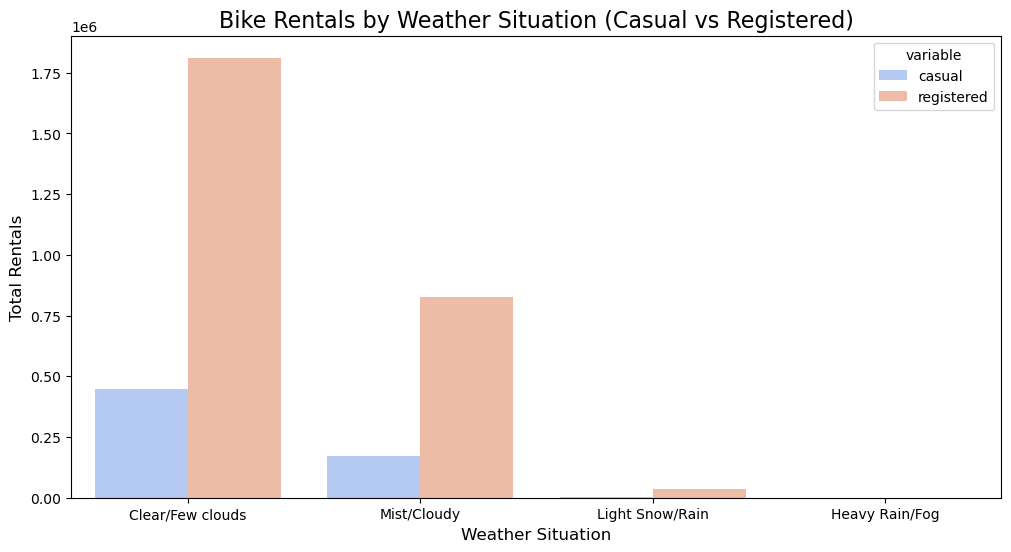

In [35]:
# Buat barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='weather_impact', 
    y='value', 
    hue='variable', 
    data=day_df[['weather_impact', 'casual', 'registered']].melt(id_vars='weather_impact'), 
    estimator=sum, 
    errorbar=None,
    palette='coolwarm',
    order=['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Fog']
)

# Set judul dan label
plt.title('Bike Rentals by Weather Situation (Casual vs Registered)', fontsize=16)
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(False)
plt.show()

Hasil Menunjukkan Rental Sepeda terbesar terjadi pada cuaca Clear/Few Clouds dengan lonjakan terbesar dipimpin oleh user registered.

#### Apakah ada peningkatan atau penurunan tren penyewaan sepeda dari tahun ke tahun

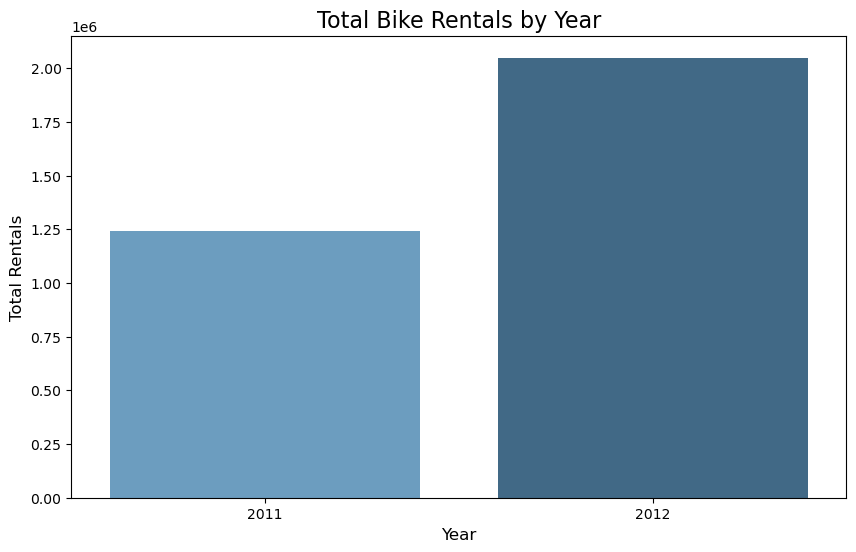

In [36]:
rentals_per_year = day_df.groupby('yr')['cnt'].sum().reset_index()

# Menambahkan label tahun yang lebih mudah dipahami
rentals_per_year['year'] = rentals_per_year['yr'].map({0: '2011', 1: '2012'})

# Hitung perubahan persentase dari tahun ke tahun
rentals_per_year['change_percentage'] = rentals_per_year['cnt'].pct_change() * 100

# Visualisasi tren penyewaan sepeda per tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cnt', hue='year', data=rentals_per_year, palette='Blues_d')
plt.title('Total Bike Rentals by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(False)
plt.show()

Data yang tersedia dalam 2 tahun menunjukkan peningkatan tren pemimjaman sepeda selama satu tahun.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [37]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

last_date = day_df['dteday'].max()

# Menghitung Recency, Frequency, dan Monetary
rfm_df = day_df.groupby('instant').agg({
    'dteday': lambda x: (last_date - x.max()).days,  # Recency
    'cnt': 'sum'  # Total penyewaan sebagai Frequency
}).reset_index()

rfm_df.columns = ['user_id', 'recency', 'frequency']

# Menghitung Monetary (menggunakan cnt sebagai nilai monetary)
rfm_df['monetary'] = rfm_df['frequency']  # Anggap 1 penyewaan = 1 unit nilai
print(rfm_df.head())

   user_id  recency  frequency  monetary
0        1      730        985       985
1        2      729        801       801
2        3      728       1349      1349
3        4      727       1562      1562
4        5      726       1600      1600


- Recency: Mengukur seberapa baru pelanggan melakukan transaksi.

- Frequency: Mengukur seberapa sering pelanggan melakukan transaksi dalam periode yang ditentukan.

- Monetary: Mengukur total nilai transaksi yang dilakukan oleh pelanggan.

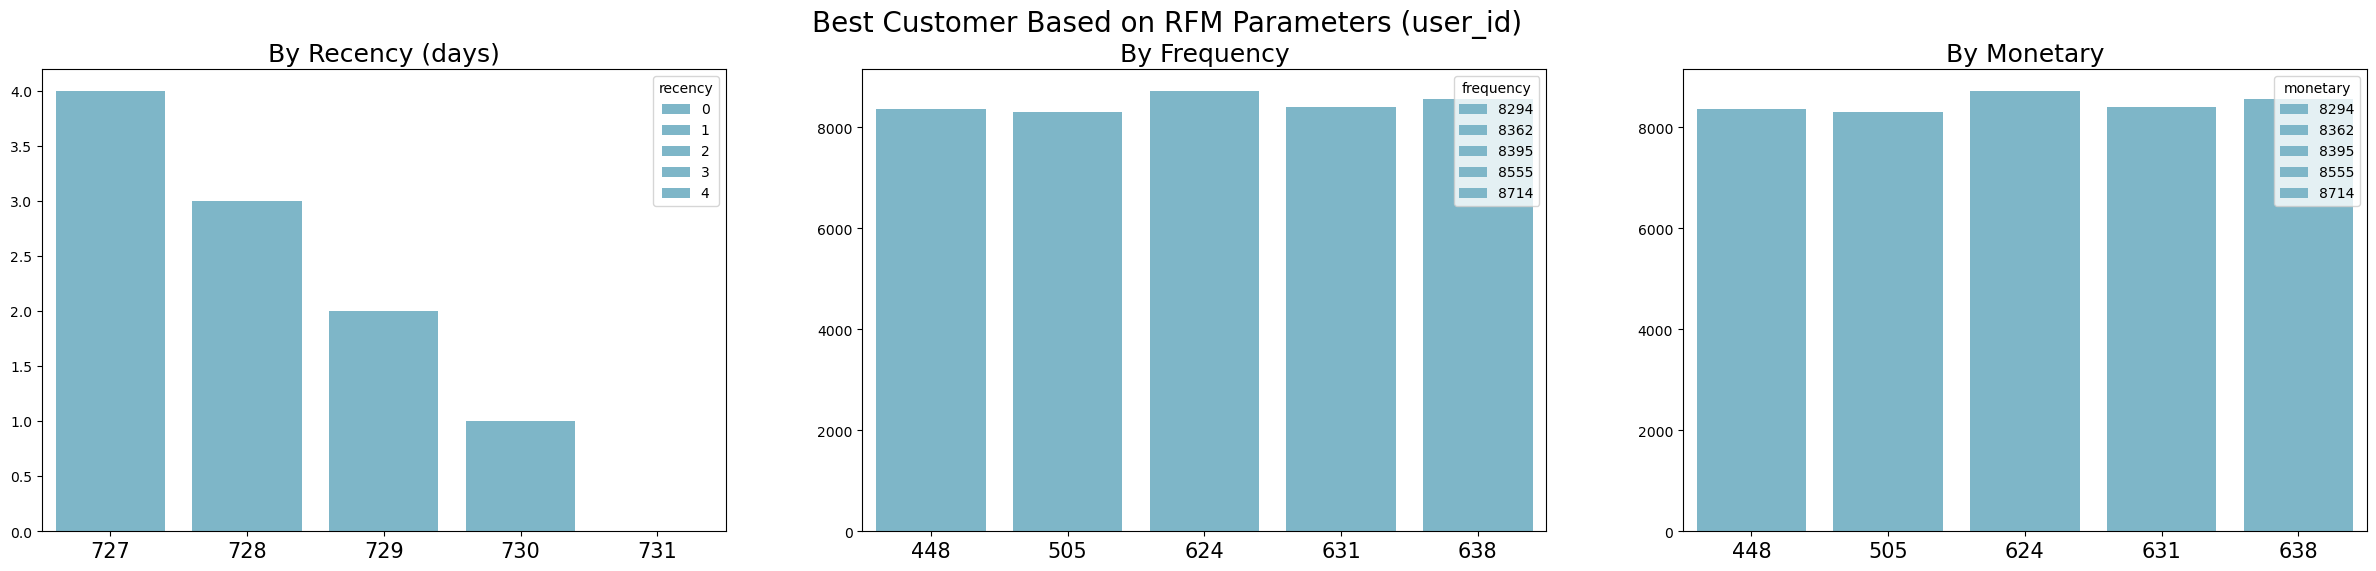

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4"] * 5

sns.barplot(
  hue="recency",
    y="recency", 
    x="user_id", 
    data=rfm_df.sort_values(by="recency", ascending=True).head(5), 
    palette=colors, 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(
  hue='frequency',
    y="frequency", 
    x="user_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(
  hue='monetary',
    y="monetary", 
    x="user_id", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    palette=colors, 
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Judul utama
plt.suptitle("Best Customer Based on RFM Parameters (user_id)", fontsize=20)
plt.show()

## Conclusion

1. Cuaca sangat berpengaruh dalam penyewaan sepeda, cuaca cerah akan meningkatkan penjualan sepeda sedang kan cuaca hujan tidak terjadi penyewaan sepeda.
2. Hari kerja meningkatkan penyewaan sepeda sedangkan hari libur berlaku sebaliknya, di asumsikan ketika hari bekerja meingkatnya aktivitas masyarakat.
3. Pengunaan yang terdaftar resmi/registered terdapat perbedaan yang sangat signifikan yang mana registered lebih banyak dari pada pengguna Casual.
4. Terjadi peningkatan Tren penyewaan pada tahun 2011 - 2012.